
# Feature importances with forests of trees


This examples shows the use of forests of trees to evaluate the importance of
features on an artificial classification task. The red bars are the feature
importances of the forest, along with their inter-trees variability.

As expected, the plot suggests that 3 features are informative, while the
remaining are not.


In [1]:
%matplotlib inline
print(__doc__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#from sklearn.ensemble import ExtraTreesClassifier

Automatically created module for IPython interactive environment


In [2]:
# import train data and randomize
ALL_data = pd.read_csv("iris.csv")
ALL_data = ALL_data.sample(frac=1)

In [3]:
ALL_data['NameInt'] = pd.Categorical(ALL_data['Name']).codes

In [4]:
train=ALL_data.values[0:100,]
test=ALL_data.values[100:,]
test.shape

(50, 6)

In [5]:
ALL_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,NameInt
11,4.8,3.4,1.6,0.2,Iris-setosa,0
108,6.7,2.5,5.8,1.8,Iris-virginica,2
114,5.8,2.8,5.1,2.4,Iris-virginica,2
82,5.8,2.7,3.9,1.2,Iris-versicolor,1
26,5.0,3.4,1.6,0.4,Iris-setosa,0


In [6]:


# X, y = make_classification(n_samples=1000,
#                            n_features=10,
#                            n_informative=3,
#                            n_redundant=0,
#                            n_repeated=0,
#                            n_classes=2,
#                            random_state=0,
#                            shuffle=False)

X=train[:,0:4]
y=train[:,5]

# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=2500,
                              random_state=0)



In [7]:
y=np.asarray(train[:,5], dtype="|S6")
forest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2500, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

Feature ranking:
1. feature 2 (0.442454)
2. feature 3 (0.410526)
3. feature 0 (0.118510)
4. feature 1 (0.028510)


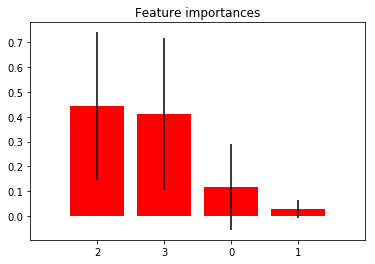

In [8]:

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [9]:
X_test=test[:,0:4]
y_test=np.asarray(test[:,5], dtype="|S6")
results = forest.predict(X_test)

In [23]:
print(y_test)
print(results)
true_pred_count=np.sum(y_test==results)
print("True predictions %d out of %d : Accuracy %.4f " % (true_pred_count,len(y_test),true_pred_count/len(y_test)*100))


[b'0' b'1' b'0' b'0' b'2' b'1' b'1' b'2' b'2' b'2' b'0' b'1' b'1' b'2' b'0'
 b'1' b'0' b'0' b'2' b'2' b'1' b'0' b'1' b'2' b'1' b'1' b'1' b'0' b'2' b'1'
 b'0' b'0' b'1' b'0' b'1' b'2' b'1' b'1' b'1' b'0' b'1' b'1' b'2' b'2' b'0'
 b'1' b'2' b'1' b'1' b'0']
[b'0' b'1' b'0' b'0' b'2' b'1' b'1' b'2' b'2' b'2' b'0' b'1' b'1' b'2' b'0'
 b'1' b'0' b'0' b'2' b'2' b'1' b'0' b'1' b'2' b'1' b'1' b'1' b'0' b'2' b'1'
 b'0' b'0' b'1' b'0' b'1' b'2' b'1' b'1' b'1' b'0' b'1' b'2' b'2' b'2' b'0'
 b'1' b'2' b'1' b'1' b'0']
True predictions 49 out of 50 : Accuracy 98.0000 
